--- Data Awal ---
            BBCA  ICBP  ADRO
Tanggal                     
2025-08-01  8700  9500  2800
2025-08-02  8725  9525  2750
2025-08-03  8750  9475  2825
2025-08-04  8800  9550  2850
2025-08-05  8775  9600  2790
2025-08-08  8825  9575  2900
2025-08-09  8850  9625  2880
2025-08-10  8900  9600  2920
2025-08-11  8875  9650  2950
2025-08-12  8925  9675  3000

--- Ringkasan Statistik Dasar ---
              BBCA         ICBP         ADRO
count    10.000000    10.000000    10.000000
mean   8812.500000  9577.500000  2866.500000
std      75.691259    65.032043    78.033113
min    8700.000000  9475.000000  2750.000000
25%    8756.250000  9531.250000  2806.250000
50%    8812.500000  9587.500000  2865.000000
75%    8868.750000  9618.750000  2915.000000
max    8925.000000  9675.000000  3000.000000

--- Hari di mana BBCA Mengalami Kenaikan ---
            BBCA  ICBP  ADRO  Return_BBCA  Return_ICBP  Return_ADRO
Tanggal                                                            
2025-08-02  

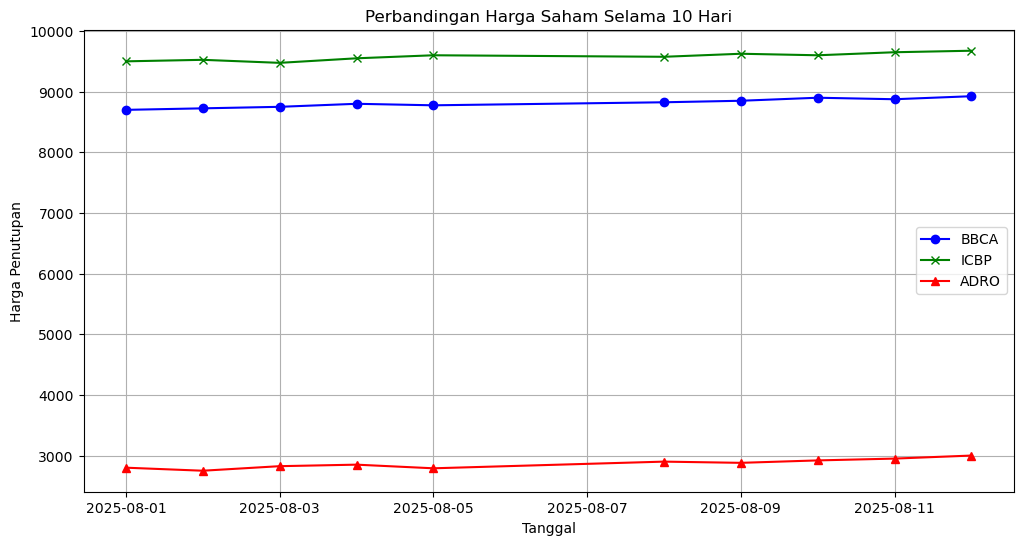


--- Matriks Korelasi Harga ---
          BBCA      ICBP      ADRO
BBCA  1.000000  0.867640  0.925311
ICBP  0.867640  1.000000  0.768252
ADRO  0.925311  0.768252  1.000000

--- Matriks Korelasi Return Harian ---
             Return_BBCA  Return_ICBP  Return_ADRO
Return_BBCA     1.000000    -0.353437     0.513564
Return_ICBP    -0.353437     1.000000    -0.627083
Return_ADRO     0.513564    -0.627083     1.000000


In [1]:
# ===================================================================
# Laporan Analisis Portofolio
# Aset: BBCA, ICBP, ADRO
# ===================================================================

# --- Bagian 1: Import Library & Persiapan Data ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Harga Penutupan Selama 10 Hari Perdagangan
data_harga = {
    'Tanggal': [
        '2025-08-01', '2025-08-02', '2025-08-03', '2025-08-04', '2025-08-05',
        '2025-08-08', '2025-08-09', '2025-08-10', '2025-08-11', '2025-08-12'
    ],
    'BBCA': [8700, 8725, 8750, 8800, 8775, 8825, 8850, 8900, 8875, 8925],
    'ICBP': [9500, 9525, 9475, 9550, 9600, 9575, 9625, 9600, 9650, 9675],
    'ADRO': [2800, 2750, 2825, 2850, 2790, 2900, 2880, 2920, 2950, 3000]
}

# Membuat DataFrame dan mengatur Tanggal sebagai index
df = pd.DataFrame(data_harga)
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.set_index('Tanggal')

print("--- Data Awal ---")
print(df)
print("\n--- Ringkasan Statistik Dasar ---")
print(df.describe())

# ===================================================================
# --- Bagian 2: Feature Engineering & Analisis Mendalam ---
# ===================================================================

# Membuat kolom return harian untuk setiap saham
df['Return_BBCA'] = df['BBCA'].pct_change()
df['Return_ICBP'] = df['ICBP'].pct_change()
df['Return_ADRO'] = df['ADRO'].pct_change()

# Menyaring hari di mana BBCA naik
bbca_naik = df[df['Return_BBCA'] > 0]
print("\n--- Hari di mana BBCA Mengalami Kenaikan ---")
print(bbca_naik)

# Menyaring hari di mana ADRO naik lebih dari 2%
adro_naik_signifikan = df[df['Return_ADRO'] > 0.02]
print("\n--- Hari di mana ADRO Naik Lebih dari 2% ---")
print(adro_naik_signifikan)

# ===================================================================
# --- Bagian 3: Analisis Visual & Relasional ---
# ===================================================================

# Membuat grafik garis pergerakan harga
print("\nMembuat grafik pergerakan harga...")
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['BBCA'], label='BBCA', color='blue', marker='o')
plt.plot(df.index, df['ICBP'], label='ICBP', color='green', marker='x')
plt.plot(df.index, df['ADRO'], label='ADRO', color='red', marker='^')
plt.title('Perbandingan Harga Saham Selama 10 Hari')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.grid(True)
plt.show()

# Menghitung matriks korelasi harga
korelasi_harga = df[['BBCA', 'ICBP', 'ADRO']].corr()
print("\n--- Matriks Korelasi Harga ---")
print(korelasi_harga)

# Menghitung matriks korelasi return harian
korelasi_return = df[['Return_BBCA', 'Return_ICBP', 'Return_ADRO']].corr()
print("\n--- Matriks Korelasi Return Harian ---")
print(korelasi_return)


## Laporan Analisis Portofolio: BBCA, ICBP, ADRO
Ini adalah analisis singkat mengenai performa dan karakteristik tiga saham dari sektor yang berbeda selama periode 10 hari perdagangan.

### **1. Volatility (Volatilitas)**
Berdasarkan standar deviasi dari return harian (lihat output dari .describe() pada kolom return), urutan saham dari yang paling stabil hingga paling volatil adalah:
* **Paling Stabil:** ICBP
* **Cukup Volatil:** BBCA
* **Paling Volatil:** ADRO

### **2. Performance (Kinerja)**
Berdasarkan pergerakan harga dari awal hingga akhir periode (lihat grafik dan hitung total return manual), saham yang memberikan performa terbaik adalah:
* **Performa Terbaik:** "Performa terbaik diraih oleh ADRO dengan kenaikan 7.14%, diikuti oleh BBCA (2.59%), dan ICBP (1.84%)."
* **Performa Terendah:** ICBP (1.84%).Jadi dapat di simpulkan pergerakannya sangat datar.

### **3. Diversification (Diversifikasi)**
Berdasarkan matriks korelasi return harian, pasangan saham yang memberikan manfaat diversifikasi terbaik (memiliki korelasi terendah, paling mendekati 0 atau negatif) adalah:
* **Pasangan Terbaik untuk Diversifikasi:** BBCA Dan ICBP dengan nilai korelasi sebesar -0.353437.

### **4. Rekomendasi**
Jika saya harus merekomendasikan SATU saham untuk diinvestasikan berdasarkan analisis singkat ini, saya akan memilih:
* **Pilihan Saham:** ADRO Dan ICBP
* **Alasan:** Jika Anda suka dengan pergerakan yang Volatil yang memiliki return yang tinggi namun juga beresiko tinggi saya sarankan Saham ADRO ATAU Jika Anda tidak ingin mengambil resiko yang tinggi dan tidak masalah dengan return yang rendah saya sarankan Saham ICBP.